In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import os

In [2]:
def getName(file_path):
    return file_path.split('\\')[-1]

In [3]:
def importDataInfo():
    columns = ['Center','Left','Right','Steering','Throttle','Break','Speed']
    data = pd.read_csv(r"../input/driving-log/driving_log.csv", names=columns)

    data['Center'] = data['Center'].apply(getName)
    return data

In [4]:
data = importDataInfo()

In [5]:
data.head()

,Center,Left,Right,Steering,Throttle,Break,Speed
0,center_2022_03_15_21_35_15_294.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.0,0.0,0,0.000003
1,center_2022_03_15_21_35_15_365.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.0,0.0,0,0.000024
2,center_2022_03_15_21_35_15_438.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.0,0.0,0,0.000016
3,center_2022_03_15_21_35_15_511.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.0,0.0,0,0.000003
4,center_2022_03_15_21_35_15_584.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.0,0.0,0,0.000011


(array([  76.,  198.,  348.,  473.,  355., 8628.,  146.,   71.,   46.,
          39.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

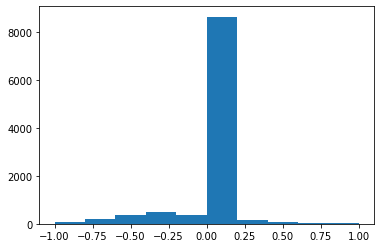

In [6]:
plt.hist(data.Steering)

In [7]:
def balanceData(data, display=True):
    nBins = 31
    samplesPerBin = 1000
    hist, bins = np.histogram(data['Steering'], nBins)
    if display:
        center = (bins[:-1] + bins[1:]) * 0.5
        plt.bar(center, hist, width=0.06)
        plt.plot((-1, 1), (samplesPerBin, samplesPerBin))
        plt.show()

    removeIndexList = []
    for i in range(nBins):
        binDataList = []
        for k in range(len(data['Steering'])):
            if data['Steering'][k] >= bins[i] and data['Steering'][k] <= bins[i+1]:
                binDataList.append(k)
        binDataList = shuffle(binDataList)
        binDataList = binDataList[samplesPerBin:]
        removeIndexList.extend(binDataList)
    data.drop(data.index[removeIndexList],inplace=True)

    if display:
        hist, _ = np.histogram(data['Steering'], nBins)
        plt.bar(center, hist, width=0.06)
        plt.plot((-1, 1), (samplesPerBin, samplesPerBin))
        plt.show()
    return data

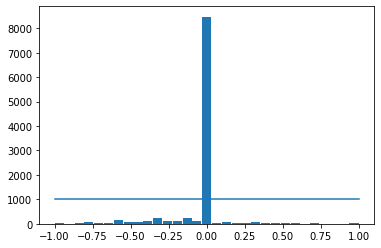

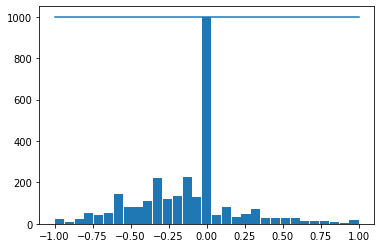

,Center,Left,Right,Steering,Throttle,Break,Speed
7,center_2022_03_15_21_35_15_800.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,0.000000,0,0.000006
8,center_2022_03_15_21_35_15_874.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,-0.20,0.218051,0,0.147390
9,center_2022_03_15_21_35_15_945.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,-0.35,0.382067,0,0.360955
14,center_2022_03_15_21_35_16_311.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,-0.20,1.000000,0,4.085759
15,center_2022_03_15_21_35_16_384.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,-0.35,1.000000,0,4.774104
...,...,...,...,...,...,...,...
10350,center_2022_03_15_21_48_05_288.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,1.000000,0,30.190520
10356,center_2022_03_15_21_48_05_733.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,1.000000,0,30.190520
10357,center_2022_03_15_21_48_05_809.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,1.000000,0,30.190960
10358,center_2022_03_15_21_48_05_883.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,1.000000,0,30.190720


In [8]:
balanceData(data, display=True)

In [9]:
def loadData(data):
    imagesPath = []
    steering = []

    for i in range(len(data)):
        indexedData = data.iloc[i]
        imagesPath.append(os.path.join("../input/image-data/IMG", indexedData[0]))
        steering.append(float(indexedData[3]))
    imagesPath = np.asarray(imagesPath)
    steering = np.asarray(steering)
    return imagesPath, steering

In [10]:
X,y = loadData(data)

In [11]:
X[:5]

array(['../input/image-data/IMG/center_2022_03_15_21_35_15_800.jpg',
       '../input/image-data/IMG/center_2022_03_15_21_35_15_874.jpg',
       '../input/image-data/IMG/center_2022_03_15_21_35_15_945.jpg',
       '../input/image-data/IMG/center_2022_03_15_21_35_16_311.jpg',
       '../input/image-data/IMG/center_2022_03_15_21_35_16_384.jpg'],
      dtype='<U58')

In [12]:
y[:5]

array([ 0.  , -0.2 , -0.35, -0.2 , -0.35])

In [13]:
print(X.shape)
print(y.shape)

(2907,)
(2907,)


In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [15]:
print(X_train.shape)
print(X_test.shape)

(2325,)
(582,)


In [16]:
import matplotlib.image as mpimg

In [17]:
from imgaug import augmenters as iaa
import cv2

In [18]:
def augmentImage(X,y):
    img = mpimg.imread(X)
    ##PAN
    if np.random.rand() <0.5:
        pan = iaa.Affine(translate_percent={'x':(-0.1,0.1),'y':(-0.1,0.1)})
        img = pan.augment_image(img)
    
    ##ZOOM
    if np.random.rand() <0.5:
        zoom = iaa.Affine(scale=(1,1.2))
        img = zoom.augment_image(img)

    ## BRIGHTNESS
    if np.random.rand() <0.5:
        brightness = iaa.Multiply((0.4,1.2))
        img = brightness.augment_image(img)
        
    ##FLIP
    if np.random.rand() <0.5:
        img = cv2.flip(img,1)
        y = - y

    return img, y

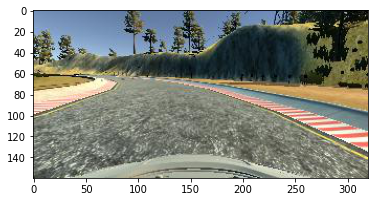

In [19]:
actual = "../input/image-data/IMG/center_2022_03_15_21_35_15_365.jpg"
img = mpimg.imread(actual)
plt.imshow(img)

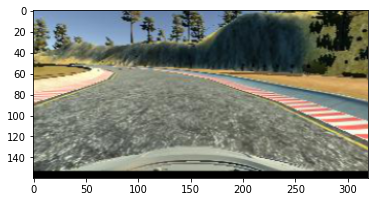

In [20]:
img, ster = augmentImage("../input/image-data/IMG/center_2022_03_15_21_35_15_365.jpg",0)
plt.imshow(img)

In [21]:
def preProcess(img):
    img = img[60:135,:,:]
    img =cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(200,66))
    img = img/255
    return img

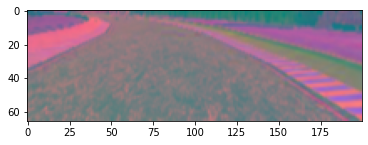

In [22]:
img = mpimg.imread(actual)
img = preProcess(img)
plt.imshow(img)

In [23]:
import random 

def batchGenerator(imagesPath, steeringList, batchSize, trainFlag):
    while True:
        imgBatch = []
        steeringBatch = []
        
        for i in range(batchSize):
            index = random.randint(0,imagesPath.shape[0]-1)
            if trainFlag:
                img, steering = augmentImage(imagesPath[index], steeringList[index])
            else:
                img = mpimg.imread(imagesPath[index])
                steering = steeringList[index]
            img = preProcess(img)
            imgBatch.append(img)
            steeringBatch.append(steering)
        yield(np.asarray(imgBatch), np.asarray(steeringBatch))
        

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [25]:
def createModel():
    model = Sequential()
    model.add(Convolution2D(24,(5,5),(2,2), input_shape=(66,200,3), activation='elu'))
    model.add(Convolution2D(36,(5,5),(2,2),  activation='elu'))
    model.add(Convolution2D(48,(5,5),(2,2),  activation='elu'))
    model.add(Convolution2D(64,(3,3),  activation='elu'))
    model.add(Convolution2D(64,(3,3),  activation='elu'))
    
    model.add(Flatten())
    model.add(Dense(100,activation='elu'))
    model.add(Dense(50,activation='elu'))
    model.add(Dense(10,activation='elu'))
    model.add(Dense(1))
    
    model.compile(Adam(learning_rate=0.0001),loss='mse')
    
    return model

In [26]:
model = createModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

2022-03-15 16:57:42.651707: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 16:57:42.736737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 16:57:42.737467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 16:57:42.738719: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [27]:
history = model.fit(batchGenerator(X_train,y_train,100,1),steps_per_epoch=300,epochs=10,validation_data=batchGenerator(X_test,y_test,100,0),validation_steps=200)

2022-03-15 16:57:45.764519: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-15 16:57:47.166386: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


300/300 [==============================] - 181s 583ms/step - loss: 0.1049 - val_loss: 0.0737
Epoch 2/10
300/300 [==============================] - 169s 564ms/step - loss: 0.0910 - val_loss: 0.0728
Epoch 3/10
300/300 [==============================] - 168s 563ms/step - loss: 0.0878 - val_loss: 0.0650
Epoch 4/10
300/300 [==============================] - 170s 567ms/step - loss: 0.0812 - val_loss: 0.0654
Epoch 5/10
300/300 [==============================] - 167s 559ms/step - loss: 0.0741 - val_loss: 0.0620
Epoch 6/10
300/300 [==============================] - 167s 557ms/step - loss: 0.0730 - val_loss: 0.0727
Epoch 7/10
300/300 [==============================] - 166s 556ms/step - loss: 0.0717 - val_loss: 0.0584
Epoch 8/10
300/300 [==============================] - 167s 557ms/step - loss: 0.0699 - val_loss: 0.0633
Epoch 9/10
300/300 [==============================] - 167s 558ms/step - loss: 0.0694 - val_loss: 0.0598
Epoch 10/10
300/300 [==============================] - 172s 576ms/step - lo

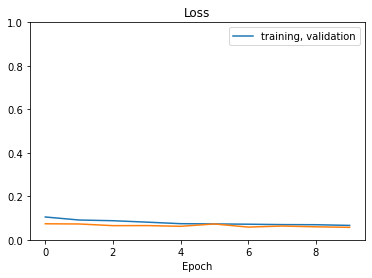

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training, validation"])
plt.ylim([0,1])
plt.title("Loss")
plt.xlabel("Epoch")
plt.show()

In [29]:
model.save('model2.h5')